<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/media/enri/Mi_Proyecto/Py_Proyecto_2020/Py_Paso_Peregrino'

Comprobamos que grafica bien y el tipo de datos importados. Las fechas del índice de las filas son del tipo "object". Esto puede ser debido a lo que se menciona en [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), consultando "parse_dates". "...Si una columna o índice no puede representarse como una matriz de fechas y horas, por ejemplo, debido a un valor no analizable o una mezcla de zonas horarias, la columna o índice se devolverá sin alterar como un tipo de datos de objeto 

Date      object
Close    float64
dtype: object
            Close
Date             
29/09/2008   10.0
30/09/2008   10.0
01/10/2008   10.0
<class 'pandas.core.frame.DataFrame'>
Index: 2935 entries, 29/09/2008 to 30/04/2020
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2935 non-null   float64
dtypes: float64(1)
memory usage: 45.9+ KB
None


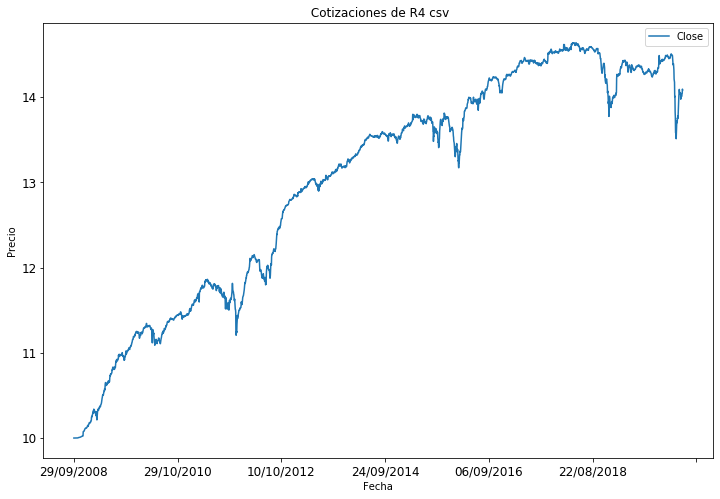

In [61]:
# Leer fichero descargado de Renta 4
os.chdir("/media/enri/Mi_Proyecto/Py_Proyecto_2020/Py_Paso_Peregrino/Ficheros_R4_csv/")
df_temp = pd.read_csv("DedaloPP.csv" ,index_col = "Date",  decimal  =",", parse_dates = ["Date"], 
                      usecols = ["Date", "Close"],  na_values = ["nan"], sep='\t')
df_temp = df_temp.dropna()
df1 = df_temp.reset_index()

#Grafica de las cotizaciones
title =" Cotizaciones de R4 csv"
ax = df_temp.plot(title=title, fontsize=12, figsize=(12,8))
ax.set_xlabel("Fecha")
ax.set_ylabel("Precio")

print (df1.dtypes)
print (df_temp[:3])
print (df_temp.info())

Apreciamos en el eje de ordenadas de la gráfica las fechas de l Index, (forato texto).

A continuación, antes de graficar, convertimos el formato "object" al formato "datetime64", y construimos la gráfica.

,Close
Date,
2016-04-01,13.611
2016-05-01,13.611
2016-06-01,13.588


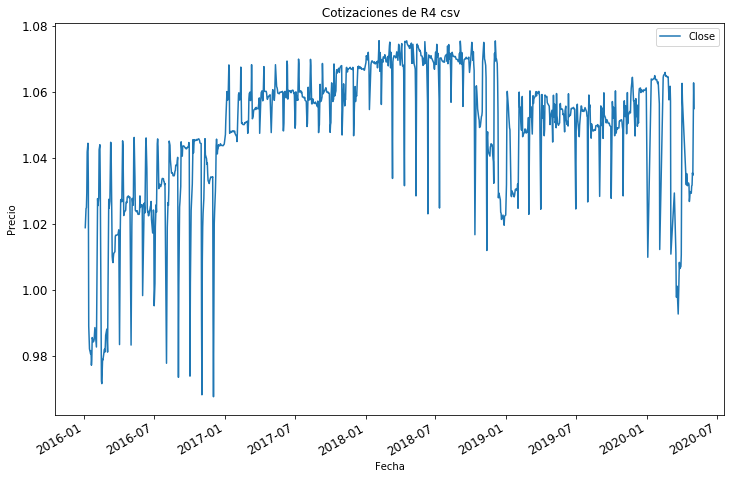

In [66]:
# Leer fichero descargado de Renta 4
os.chdir("/media/enri/Mi_Proyecto/Py_Proyecto_2020/Py_Paso_Peregrino/Ficheros_R4_csv/")
df_temp = pd.read_csv("DedaloPP.csv" ,index_col = "Date",  decimal  =",", parse_dates = ["Date"], 
                      usecols = ["Date", "Close"],  na_values = ["nan"], sep='\t')
df_temp = df_temp.dropna()
df1 = df_temp.reset_index()

df_temp.reset_index(inplace=True)

df_temp["Date"] = pd.to_datetime(df_temp["Date"])
pd.to_datetime(df_temp["Date"], errors = "coerce", format = "%Y-%m-%d")
assets = df_temp.set_index("Date")["2016-1-4":"2020-5-5"]

# Normalizar los precios utilizando la primera fila del df 
#assets_filtrado = assets.loc[inicio: fin]
assets_normalizados = assets / assets.iloc[0, :]

# Representación gráfica
title =" Cotizaciones de R4 csv"
ax = assets_normalizados.plot(title=title, fontsize=12, figsize=(12,8))
ax.set_xlabel("Fecha")
ax.set_ylabel("Precio")

assets[:3]